# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 39
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [ ]:
df_t = pd.DataFrame({'id':range(0,3),'n':[3,1,1]})
df_t.drop_duplicates(subset = 'n',inplace = True)
df_t.head()

,id,n
0,0,3
1,1,1


In [ ]:
# Generate dataframe to store web reviews
df = pd.DataFrame({'reviews':reviews})
df.head()

,reviews
0,✅ Trip Verified | Appalling service with fai...
1,✅ Trip Verified | British Airways charge you f...
2,✅ Trip Verified | What is wrong with you guys?...
3,✅ Trip Verified | We booked two business cla...
4,✅ Trip Verified | I’ve flown with many airline...


In [ ]:
#df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
#Standardize text (convert to lowercase and remove unnecessary characters like URLs or special characters)
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text inside brackets (if any)
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and special characters, keep only letters and spaces
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    text = re.sub(r'(trip verified|not verified)', '', text)  # Remove 'Trip Verified' or 'Not Verified'
    return text

# Apply the cleaning function to the 'Review_Text' column
df['cleaned_reviews'] = df['reviews'].apply(clean_text)

# Remove short reviews (e.g., reviews with less than 5 words)
df = df[df['cleaned_reviews'].str.split().apply(len) > 5]

# Reset the index after cleaning
df.reset_index(drop=True, inplace=True)

df.head()

,reviews,cleaned_reviews
0,✅ Trip Verified | Appalling service with fai...,appalling service with failing defective flee...
1,✅ Trip Verified | British Airways charge you f...,british airways charge you for the pleasure o...
2,✅ Trip Verified | What is wrong with you guys?...,what is wrong with you guys people pay lots o...
3,✅ Trip Verified | We booked two business cla...,we booked two business class seat with britis...
4,✅ Trip Verified | I’ve flown with many airline...,ive flown with many airlines but my recent ex...


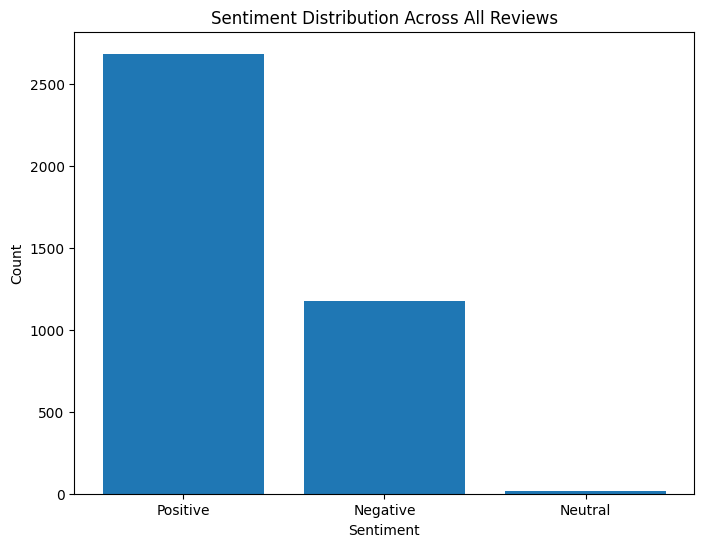

sentiment
Positive    2682
Negative    1173
Neutral       19
Name: count, dtype: int64


In [ ]:
# Function to get sentiment polarity
def get_sentiment(review):
    analysis = TextBlob(review)
    # TextBlob returns a polarity between -1 (very negative) and 1 (very positive)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to each review
df['sentiment'] = df['cleaned_reviews'].apply(get_sentiment)
# Count the number of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plot the sentiment distribution across all reviews
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution Across All Reviews')
plt.show()

# Display the counts
print(sentiment_counts)

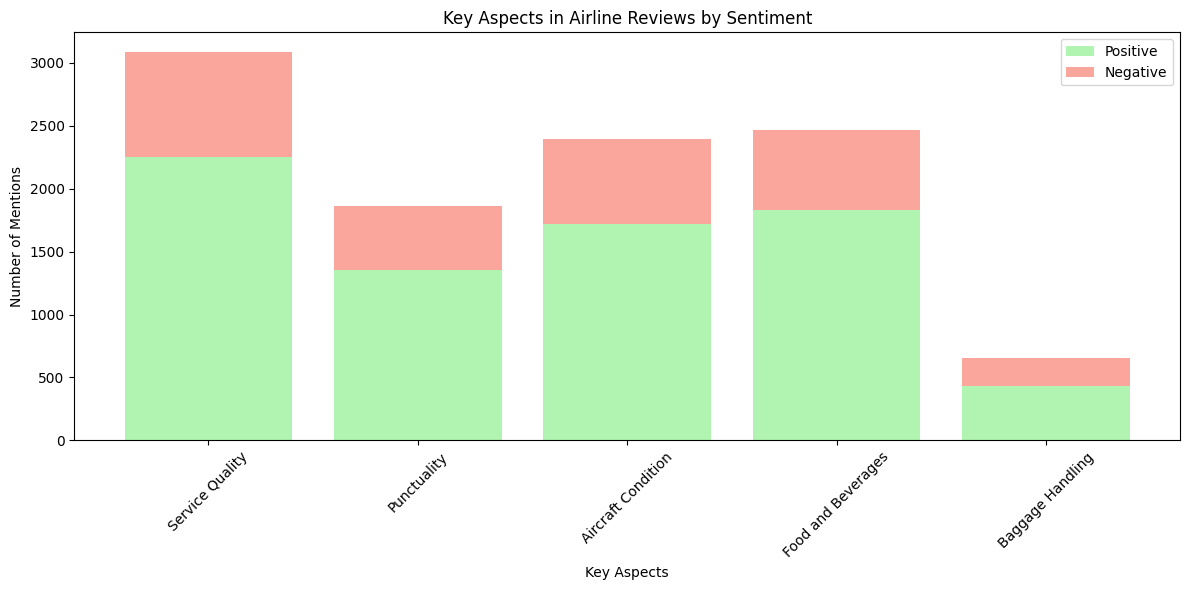

In [ ]:
# Sample keywords for each aspect
aspect_keywords = {
    'Service Quality': ['crew', 'attentive', 'friendliness', 'helpful', 'staff', 'service'],
    'Punctuality': ['on time', 'delayed', 'delay', 'punctual', 'late', 'early'],
    'Aircraft Condition': ['cleanliness', 'seat quality', 'seat', 'IFE', 'lavatories', 'dirty', 'comfortable', 'legroom'],
    'Food and Beverages': ['food', 'meal', 'drink', 'beverages', 'water', 'tasty', 'bad food'],
    'Baggage Handling': ['baggage', 'luggage', 'checked luggage', 'lost luggage', 'undamaged', 'damaged']
}

# Function to check if any keyword from a list is in the review
def check_aspect(review, keywords):
    for keyword in keywords:
        if keyword in review:
            return 1
    return 0

# Apply the keyword matching for each aspect
for aspect, keywords in aspect_keywords.items():
    df[aspect] = df['cleaned_reviews'].apply(lambda review: check_aspect(review.lower(), keywords))

# Step 1: Summarize counts of each aspect by sentiment
aspect_counts = df.groupby('sentiment')[list(aspect_keywords.keys())].sum()

# Step 2: Create a stacked bar plot
plt.figure(figsize=(12, 6))

# Create the bar plot for positive and negative sentiment counts
plt.bar(aspect_counts.columns, aspect_counts.loc['Positive'], color='lightgreen', label='Positive', alpha=0.7)
plt.bar(aspect_counts.columns, aspect_counts.loc['Negative'], bottom=aspect_counts.loc['Positive'], color='salmon', label='Negative', alpha=0.7)

# Step 3: Add titles and labels
plt.title('Key Aspects in Airline Reviews by Sentiment')
plt.xlabel('Key Aspects')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45)
plt.legend()

# Step 4: Show the plot
plt.tight_layout()
plt.show()

<ipython-input-9-9fdb84e818f8>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Pain Point', data=pain_points_df, palette='viridis')


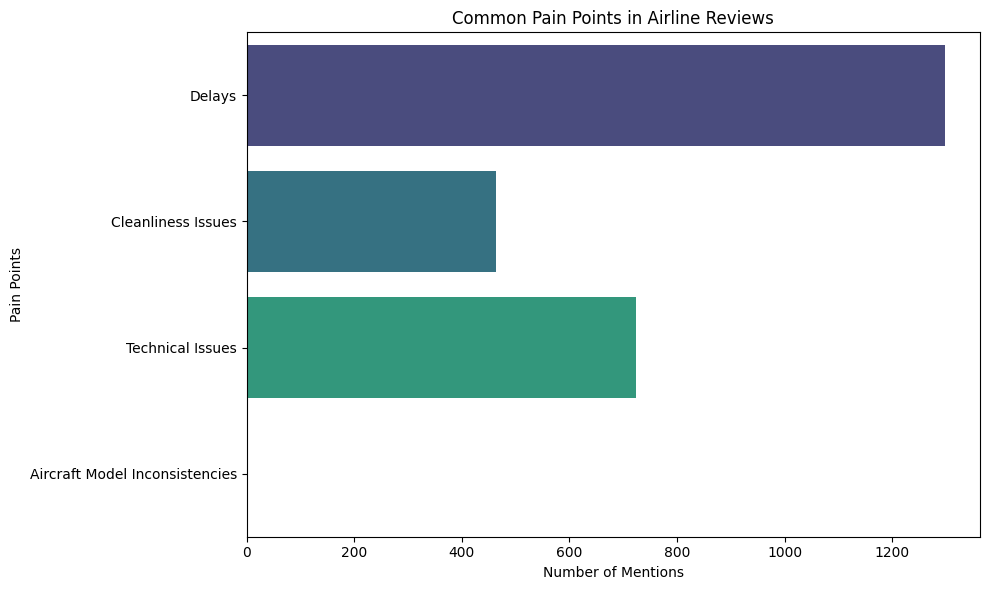

Inconsistencies Mentioned in Reviews:
Series([], Name: cleaned_reviews, dtype: object)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define common pain points and inconsistencies
pain_points_keywords = {
    'Delays': ['delayed', 'delay', 'late', 'punctuality'],
    'Cleanliness Issues': ['unclean', 'dirty', 'clogged', 'cleanliness', 'clean'],
    'Technical Issues': ['malfunction', 'ife', 'technical', 'sink', 'broken'],
    'Aircraft Model Inconsistencies': ['b787-8', 'b777-200', 'b787', 'b777']
}

# Function to count occurrences of pain points
def count_pain_points(df, keywords):
    counts = {key: 0 for key in keywords.keys()}

    for review in df['cleaned_reviews']:
        for key, kw_list in keywords.items():
            for kw in kw_list:
                if kw in review.lower():
                    counts[key] += 1
                    break  # Only count once per review for each category
    return counts

# Step 1: Count occurrences of common pain points
pain_points_counts = count_pain_points(df, pain_points_keywords)

# Step 2: Create a DataFrame for visualization
pain_points_df = pd.DataFrame(pain_points_counts.items(), columns=['Pain Point', 'Count'])

# Step 3: Create a bar plot for visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Pain Point', data=pain_points_df, palette='viridis')
plt.title('Common Pain Points in Airline Reviews')
plt.xlabel('Number of Mentions')
plt.ylabel('Pain Points')
plt.tight_layout()
plt.show()

# Step 5: Print the counts of aircraft model inconsistencies
model_inconsistencies = df['cleaned_reviews'][df['cleaned_reviews'].str.contains('B787|B777', case=False)]
print("Inconsistencies Mentioned in Reviews:")
print(model_inconsistencies)


In [ ]:
%%shell
jupyter nbconvert --to html /content/Birtish_Airline_Forge.ipynb

[NbConvertApp] WARNING | pattern '/content/Birtish_Airline_Forge.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=

CalledProcessError: Command 'jupyter nbconvert --to html /content/Birtish_Airline_Forge.ipynb
' returned non-zero exit status 255.